In [1]:
import numpy as np
import pandas as pd
import os
from matplotlib import pyplot as plt 
import cv2

In [ ]:
amo = 10
fig,ax = plt.subplots(amo, 2, figsize = (2 * 4, amo * 4))

def show(i, name):
    image = cv2.imread(f"E:/Dataset/RHD_published_v2/training/color/{name}")
    ax[i][0].imshow(image)

    mask = cv2.imread(f"E:/Dataset/RHD_published_v2/training/mask/{name}")
    _, msk = cv2.threshold(mask, 1, 255, cv2.THRESH_BINARY)
    ax[i][1].imshow(msk)

    fig.show()

for i in range(amo):
    #print(f"{i:0>5}.png")
    show(i, f"{i:0>5}.png")

C:\Users\tanas\AppData\Roaming\Python\Python39\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


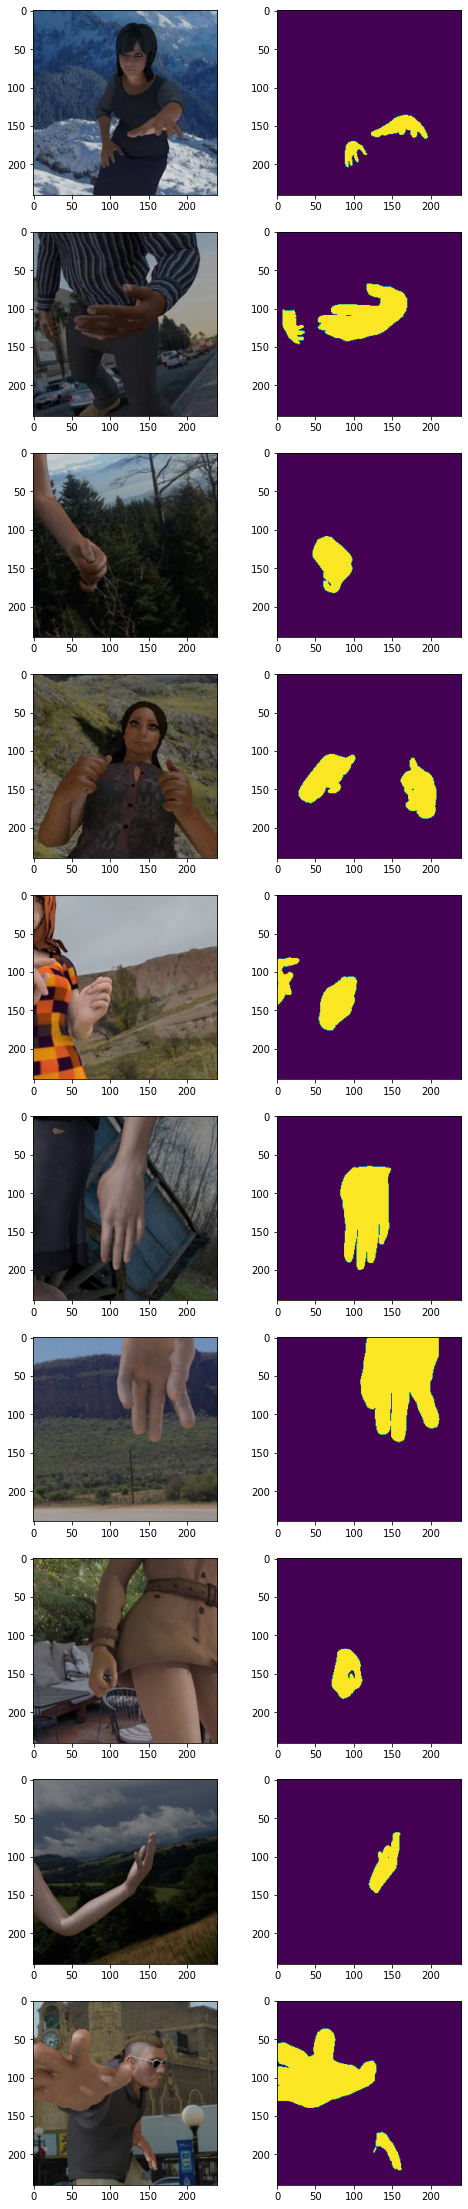

In [2]:
from RHD import RHDSegment
import torch

amo = 10
fig,ax = plt.subplots(amo, 2, figsize = (2 * 4, amo * 4))
dataset = RHDSegment("E:/Dataset/RHD_published_v2/training/", 240)

i = 0
for img, msk in dataset:
    ax[i][0].imshow(img.permute([1, 2, 0]).numpy())
    ax[i][1].imshow(msk.numpy())
    
    i += 1
    if i >= 10:
        break
    
fig.show()

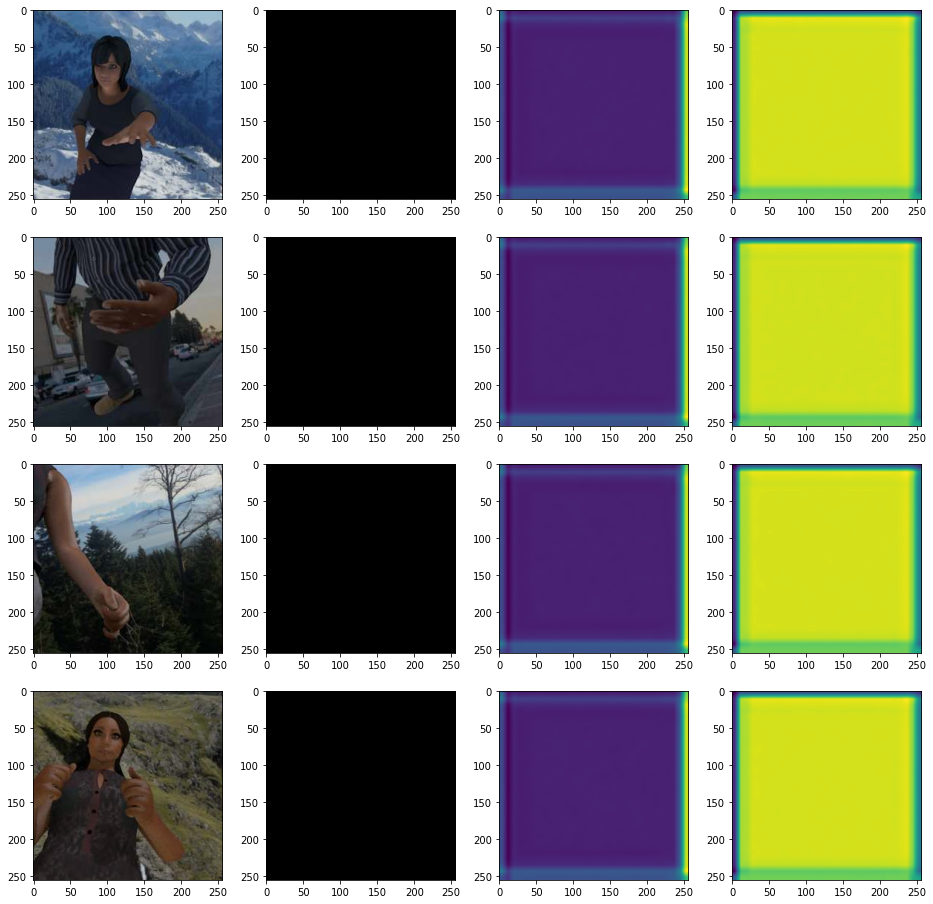

In [15]:
import numpy as np
import pandas as pd
import os
from matplotlib import pyplot as plt 
import cv2

import modelLoader
import yaml
from dataloader.RHD import RHDSegment
import torch
from util.tester import runModel

with open('.\colorHandPose\segment_cf01_RHD.yaml', 'r') as f:
    CONFIG = yaml.safe_load(f.read())
    
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = modelLoader.loadFromConfig(CONFIG).to(device)

amo = 4
fig, ax = plt.subplots(amo, 4, figsize = (4 * 4, amo * 4))
dataset = RHDSegment("E:/Dataset/RHD_published_v2/training/", CONFIG['input_size'])

i = 0
for img, msk in dataset:
    nimg = img.permute([1, 2, 0]).numpy()
    ax[i][0].imshow(nimg)
    
    segment = runModel(model, nimg, CONFIG['input_size'], device)
    sg0 = segment[0].astype(np.float32) * 255
    sg1 = segment[1].astype(np.float32) * 255
    segment = segment.argmax(0).astype(np.float32) * 255
    segment = cv2.cvtColor(segment, cv2.COLOR_GRAY2BGR)
    segment = (segment * 255).astype(np.uint8)

    ax[i][1].imshow(segment)
    ax[i][2].imshow(sg0)
    ax[i][3].imshow(sg1)
    
    i += 1
    if i >= amo:
        break
    
fig.show()